In [1]:
import numpy
from keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(10)

Using TensorFlow backend.


In [0]:
(X_img_train, y_label_train), (X_img_test, y_label_test) = cifar10.load_data()

In [3]:
print("train data:",'images:',X_img_train.shape," labels:",y_label_train.shape) 
print("test  data:",'images:',X_img_test.shape ," labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [0]:
X_img_train_normalize = X_img_train / 255.0
X_img_test_normalize = X_img_test / 255.0

In [0]:
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)

In [6]:
y_label_test_OneHot.shape

(10000, 10)

In [0]:
import keras 
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D,GlobalAveragePooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Input
from keras.layers import ZeroPadding2D
from keras.models import Model
from keras.layers import Dropout
from keras.layers import Activation

In [8]:
    model = Sequential()
    #1
    model.add(Conv2D(filters = 192,kernel_size = 5,strides = 2,activation = 'relu',input_shape = (32,32,3),padding='same',kernel_regularizer=keras.regularizers.l2(0.0001)))
    #2
    model.add(Conv2D(filters = 160,kernel_size = 1,strides = 1,activation = 'relu',padding='same',kernel_regularizer=keras.regularizers.l2(0.0001)))
    #3
    model.add(Conv2D(filters = 96,kernel_size = 1,strides = 1,activation = 'relu',padding='same',kernel_regularizer=keras.regularizers.l2(0.0001)))
    #4
    model.add(MaxPooling2D((3,3),strides=(2,2),padding='same'))
    #
    model.add(Dropout(0.5))
    #6
    model.add(Conv2D(filters = 192,kernel_size = 5,strides = 1,activation = 'relu',padding='same',kernel_regularizer=keras.regularizers.l2(0.0001)))
    #7
    model.add(Conv2D(filters = 192,kernel_size = 1,strides = 1,activation = 'relu',padding='same',kernel_regularizer=keras.regularizers.l2(0.0001)))
    #8
    model.add(Conv2D(filters = 192,kernel_size = 1,strides = 1,activation = 'relu',padding='same',kernel_regularizer=keras.regularizers.l2(0.0001)))
    #9
    model.add(MaxPooling2D((3,3),strides=(2,2),padding='same'))
    #5
    model.add(Dropout(0.5))
    #10
    model.add(Conv2D(filters = 192,kernel_size = 3,strides = 1,activation = 'relu',padding='same',kernel_regularizer=keras.regularizers.l2(0.0001)))
    #11
    model.add(Conv2D(filters = 192,kernel_size = 1,strides = 1,activation = 'relu',padding='same',kernel_regularizer=keras.regularizers.l2(0.0001)))
    #12
    model.add(Conv2D(filters = 10,kernel_size = 1,strides = 1,activation = 'relu',padding='same',kernel_regularizer=keras.regularizers.l2(0.0001)))
    #13
    model.add(GlobalAveragePooling2D())
    model.add(Activation('softmax'))

W0906 08:20:04.904279 140013565962112 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0906 08:20:04.919512 140013565962112 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0906 08:20:04.922829 140013565962112 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0906 08:20:04.964364 140013565962112 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4267: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0906 08:20:04.967099 140013565962112 deprecation_wrapp

In [9]:
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])
print(model.summary())

W0906 08:20:05.090478 140013565962112 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0906 08:20:05.113245 140013565962112 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3576: The name tf.log is deprecated. Please use tf.math.log instead.



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 16, 16, 192)       14592     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 160)       30880     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 96)        15456     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 96)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 8, 96)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 192)         460992    
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 192)        

In [10]:
train_history=model.fit(X_img_train_normalize ,y_label_train_OneHot, epochs = 150,validation_split=0.2,verbose=1,batch_size=128)

W0906 08:20:05.397635 140013565962112 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 40000 samples, validate on 10000 samples
Epoch 1/150
40000/40000 [==============================] - 10s 249us/step - loss: 2.4244 - acc: 0.0976 - val_loss: 2.4239 - val_acc: 0.1035
Epoch 2/150
40000/40000 [==============================] - 7s 164us/step - loss: 2.4239 - acc: 0.1111 - val_loss: 2.4235 - val_acc: 0.1091
Epoch 3/150
40000/40000 [==============================] - 7s 164us/step - loss: 2.4233 - acc: 0.1265 - val_loss: 2.4226 - val_acc: 0.1262
Epoch 4/150
40000/40000 [==============================] - 7s 163us/step - loss: 2.4224 - acc: 0.1533 - val_loss: 2.4209 - val_acc: 0.1449
Epoch 5/150
40000/40000 [==============================] - 7s 164us/step - loss: 2.4201 - acc: 0.1693 - val_loss: 2.4166 - val_acc: 0.1733
Epoch 6/150
40000/40000 [==============================] - 7s 164us/step - loss: 2.4134 - acc: 0.1756 - val_loss: 2.4050 - val_acc: 0.1750
Epoch 7/150
40000/40000 [==============================] - 7s 165us/step - loss: 2.3914 - acc: 0.1764 - val_loss: 2

In [11]:
#X_img_test_normalize
#y_label_test_OneHot
preds=model.evaluate(X_img_test_normalize,y_label_test_OneHot)
print("Validation loss="+str(preds[0]))
print("Validation accuracy="+str(preds[1]))

10000/10000 [==============================] - 1s 101us/step
Validation loss=0.8872733894348145
Validation accuracy=0.7418


In [0]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

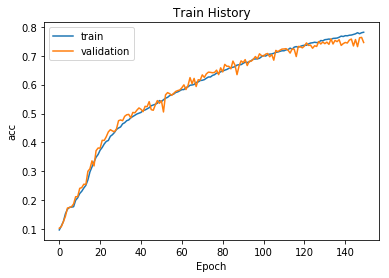

In [13]:
show_train_history(train_history,'acc','val_acc')

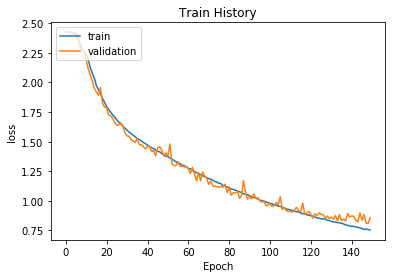

In [14]:
show_train_history(train_history,'loss','val_loss')

In [0]:
label_dict={0:"airplane",1:"automobile",2:"bird",3:"cat",4:"deer",
            5:"dog",6:"frog",7:"horse",8:"ship",9:"truck"}

In [0]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,
                                  idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx],cmap='binary')
                
        title=str(i)+','+label_dict[labels[idx][0]]
        if len(prediction)>0:
            title+='=>'+label_dict[prediction[idx]]
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

In [0]:
prediction=model.predict_classes(X_img_test_normalize)

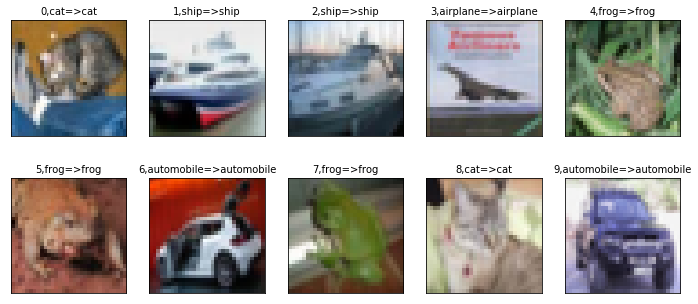

In [18]:
plot_images_labels_prediction(X_img_test,y_label_test,
                              prediction,0,10)

In [19]:
import pandas as pd
pd.crosstab(y_label_test.reshape(-1),prediction,
            rownames=['label'],colnames=['predicat'])

predicat,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,763,30,23,19,12,2,22,12,78,39
1,4,903,1,4,1,1,12,2,12,60
2,64,6,492,61,62,57,197,23,21,17
3,13,13,19,558,39,134,149,31,23,21
4,20,7,23,48,634,26,170,60,11,1
5,8,5,14,158,34,636,80,47,10,8
6,1,7,11,29,8,9,924,3,5,3
7,11,7,9,29,45,61,30,793,1,14
8,31,33,4,13,3,4,11,2,875,24
